# Image Dataset Prepartion

In this notebook, we are going to prepare an image dataset for image classification task. 
- This notebook is my learning notes for Datawhale Team Learning (2023-01 / Session 45)
- This is built upon the [Image Dataset prepration tutorial](https://github.com/TommyZihao/Train_Custom_Dataset/tree/main/%E5%9B%BE%E5%83%8F%E5%88%86%E7%B1%BB/1-%E6%9E%84%E5%BB%BA%E8%87%AA%E5%B7%B1%E7%9A%84%E5%9B%BE%E5%83%8F%E5%88%86%E7%B1%BB%E6%95%B0%E6%8D%AE%E9%9B%86) from [Tommy Zihao](https://github.com/TommyZihao)

Suppose we want to build an image classification model to classify cucumber(黄瓜), pumpkin(南瓜), winter melon(冬瓜), We need to prepare the dataset to train and test our model. 

Ideally, you already have a image dataset on cucumber, pumpkin, and winter melon. However, you may not have a such a dataset. In such a case, we need to preare the dataset from scratch. 

There are different ways to preapre the dataset from scratch. We can take pictures of cucumber, pumpkin, and winter melon, and hire labelers to label those pictures. Alterntively, we can prepare a image dataset is scraping images from online websites, reviewing and cleaning them. 

For our case here, given there are large amount of pictures of cucumber, pumpkin, winter melon on the internet, it makes sense for us to take the second approaches. 

Specifically, we take the following steps?

- Data Collection: crawl images for cucumber, pumpkin, and winter melon
- Data Reviewing: review the collected dataset based on a set of criteria
- Data Cleaning: remove system and invalid files 
- Data Exploration:
- Data Spliting: split the full dataset to two for model training and validation
- Summarary Statistics

## 1. Environment Setup

### 1.1 Change Directory

Use jupyter magic command `%cd` to change the directory to the root directory of the project

In [7]:
%cd ../

/Users/joye/Github/datawhale_team_learning/projects/202301_image_classification


### 1.2 Install Packages

Install the packages with `pip`:
- `-r` means instaling from requirements.txt
- `-q` means installing quitely

In [35]:
!pip install -q -r requirements.txt

### 1.3 Setup font for Chinese 

In [82]:
!curl https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -o SimHei.ttf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9815k  100 9815k    0     0  1325k      0  0:00:07  0:00:07 --:--:-- 1417k


In [87]:
!which python

/usr/local/Caskroom/miniforge/base/envs/joye_env/bin/python


In [94]:
!mv SimHei.ttf /usr/local/Caskroom/miniforge/base/envs/joye_env/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf

In [20]:
import matplotlib
print(matplotlib.get_cachedir())

/Users/joye/.matplotlib


In [19]:
!rm -rf /Users/joye/.matplotlib

打开配置文件matplotlibrc，并做以下修改
- 去掉 font.family前面的 # 
`font.family:  sans-serif`
- 去掉font.sans-serif前面的#，手动加SimHei
`font.sans-serif: SimHei, DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif`
- 去掉axes.unicode_minus前面的#，把True改为False
`axes.unicode_minus: False  # use Unicode for the minus symbol rather than hyphen.  See#`

[Source](https://en.wikipedia.org/wiki/Plus_and_minus_signs#Character_codes)

In [15]:
!open /usr/local/Caskroom/miniforge/base/envs/joye_env/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc

## 2. Data Collection

We leverage jupyter magic comman`%run` to run the **crawl_image.py** under the **src** folder.  It will crawl image of cucumber, pumpkin, and winter melon and save to data folder.

In [3]:
%run src/crawl_image.py

新建文件夹:data/黄瓜


201it [04:18,  1.29s/it]                                                                              


201 张图像爬取完毕
新建文件夹:data/南瓜


201it [04:12,  1.26s/it]                                                                              


201 张图像爬取完毕
新建文件夹:data/冬瓜


201it [04:04,  1.22s/it]                                                                              

201 张图像爬取完毕


## 3. Data Reviewing

- Remove irrelevant images. 
- Ensure classes are balanced. In other words, avoid imbalanced classes.
- Ensure diversity and representativeness of the dataset covering different scenarios.
- Ensure consistency between the dataset and the inference dataset.

## 4. Data Cleaning

### 4.1 Remove gifs

In [ ]:
import os
import cv2
from tqdm import tqdm

dataset_path = "data"
for cat in tqdm(os.listdir(dataset_path)):
    for file in os.listdir(os.path.join(dataset_path, cat)):
        file_path = os.path.join(dataset_path, cat, file)
        img = cv2.imread(file_path)
        if img is None:
            print(file_path, '读取错误，删除')
            os.remove(file_path)

### 4.2 Remove non-RGB Images

In [20]:
import numpy as np
from PIL import Image

for fruit in tqdm(os.listdir(dataset_path)):
    for file in os.listdir(os.path.join(dataset_path, fruit)):
        file_path = os.path.join(dataset_path, fruit, file)
        img = np.array(Image.open(file_path))
        try:
            channel = img.shape[2]
            if channel != 3:
                print(file_path, '非三通道，删除')
                os.remove(file_path)
        except:
            print(file_path, '非三通道，删除')
            os.remove(file_path)

  0%|                                                                           | 0/3 [00:00<?, ?it/s]

data/冬瓜/48.png 非三通道，删除
data/冬瓜/171.png 非三通道，删除
data/冬瓜/29.png 非三通道，删除
data/冬瓜/131.png 非三通道，删除
data/冬瓜/31.png 非三通道，删除
data/冬瓜/144.png 非三通道，删除
data/冬瓜/86.jpg 非三通道，删除


 33%|██████████████████████▎                                            | 1/3 [00:01<00:03,  1.88s/it]

data/冬瓜/84.jpg 非三通道，删除
data/南瓜/89.jpg 非三通道，删除
data/南瓜/102.jpg 非三通道，删除
data/南瓜/95.png 非三通道，删除


 67%|████████████████████████████████████████████▋                      | 2/3 [00:03<00:01,  1.71s/it]

data/南瓜/91.jpg 非三通道，删除
data/黄瓜/189.png 非三通道，删除
data/黄瓜/74.jpg 非三通道，删除
data/黄瓜/37.png 非三通道，删除
data/黄瓜/94.png 非三通道，删除
data/黄瓜/41.jpg 非三通道，删除


100%|███████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.94s/it]


### 4.3 Remove system files

In [22]:
!for i in `find . -iname '__MACOSX'`; do rm -rf $i;done
!for i in `find . -iname '.DS_Store'`; do rm -rf $i;done
!for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

## 5. Data Exploration


### 5.1 Image size Distribution

In [26]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm

# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# 指定数据集路径
os.chdir(dataset_path)
os.listdir()

['冬瓜', '南瓜', '黄瓜']

In [31]:
df = pd.DataFrame()
for fruit in tqdm(os.listdir()): # 遍历每个类别    
    os.chdir(fruit)
    for file in os.listdir(): # 遍历每张图像
        try:
            img = cv2.imread(file)
            df = df.append({'类别':fruit, '文件名':file, 
                            '图像宽':img.shape[1], 
                            '图像高':img.shape[0]}, 
                           ignore_index=True)
        except:
            print(os.path.join(fruit, file), '读取错误')
    os.chdir('../')
os.chdir('../')

100%|███████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.46s/it]


In [33]:
df.head()

,类别,文件名,图像宽,图像高
0,冬瓜,63.jpg,500,352
1,冬瓜,189.jpg,750,500
2,冬瓜,77.jpg,650,363
3,冬瓜,162.jpg,500,500
4,冬瓜,176.jpg,665,375


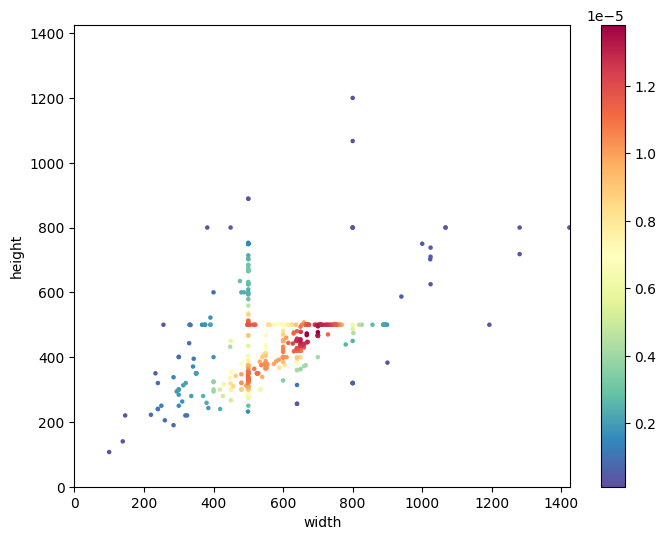

In [55]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['图像宽']
y = df['图像高']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(8,6))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
plt.colorbar()
plt.tick_params(labelsize=10)


xy_max = max(max(df['图像宽']), max(df['图像高']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=10)
plt.xlabel('width', fontsize=10)

plt.savefig('reports/图像尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()

### 5.2 Display Images

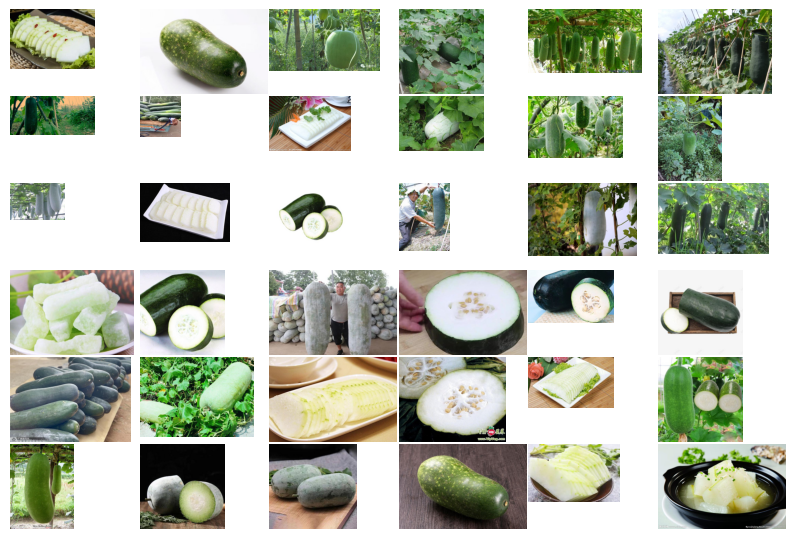

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

import numpy as np
import math
import os

import cv2

from tqdm import tqdm

folder_path = 'data/冬瓜'
N = 36

n = math.floor(np.sqrt(N))

images = []
for each_img in os.listdir(folder_path)[:N]:
    img_path = os.path.join(folder_path, each_img)
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # 类似绘制子图 subplot(111)
                 nrows_ncols=(n, n),  # 创建 n 行 m 列的 axes 网格
                 axes_pad=0.02,  # 网格间距
                 share_all=True
                 )

# 遍历每张图像
for ax, im in zip(grid, images):
    ax.imshow(im)
    ax.axis('off')

plt.show()

## 6. Data Spliting

In [59]:
import os
import shutil
import random
import pandas as pd

In [60]:
dataset_name = dataset_path.split('_')[0]
print('数据集', dataset_name)

数据集 data


In [62]:
classes = os.listdir(dataset_path)
classes

['冬瓜', '南瓜', '黄瓜']

In [66]:
# 创建 train 文件夹
os.mkdir(os.path.join(dataset_path, 'train'))

# 创建 test 文件夹
os.mkdir(os.path.join(dataset_path, 'val'))

# 在 train 和 test 文件夹中创建各类别子文件夹
for c in classes:
    os.mkdir(os.path.join(dataset_path, 'train', c))
    os.mkdir(os.path.join(dataset_path, 'val', c))

In [68]:
test_frac = 0.2  # 测试集比例
random.seed(123) # 随机数种子，便于复现
df = pd.DataFrame()

print('{:^18} {:^18} {:^18}'.format('类别', '训练集数据个数', '测试集数据个数'))

for fruit in classes: # 遍历每个类别

    # 读取该类别的所有图像文件名
    old_dir = os.path.join(dataset_path, fruit)
    images_filename = os.listdir(old_dir)
    random.shuffle(images_filename) # 随机打乱

    # 划分训练集和测试集
    testset_numer = int(len(images_filename) * test_frac) # 测试集图像个数
    testset_images = images_filename[:testset_numer]      # 获取拟移动至 test 目录的测试集图像文件名
    trainset_images = images_filename[testset_numer:]     # 获取拟移动至 train 目录的训练集图像文件名

    # 移动图像至 test 目录
    for image in testset_images:
        old_img_path = os.path.join(dataset_path, fruit, image)         # 获取原始文件路径
        new_test_path = os.path.join(dataset_path, 'val', fruit, image) # 获取 test 目录的新文件路径
        shutil.move(old_img_path, new_test_path) # 移动文件

    # 移动图像至 train 目录
    for image in trainset_images:
        old_img_path = os.path.join(dataset_path, fruit, image)           # 获取原始文件路径
        new_train_path = os.path.join(dataset_path, 'train', fruit, image) # 获取 train 目录的新文件路径
        shutil.move(old_img_path, new_train_path) # 移动文件
    
    # 删除旧文件夹
    assert len(os.listdir(old_dir)) == 0 # 确保旧文件夹中的所有图像都被移动走
    shutil.rmtree(old_dir) # 删除文件夹
    
    # 工整地输出每一类别的数据个数
    print('{:^18} {:^18} {:^18}'.format(fruit, len(trainset_images), len(testset_images)))
    
    # 保存到表格中
    df = df.append({'class':fruit, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)

# 重命名数据集文件夹
shutil.move(dataset_path, dataset_name+'_split')

# 数据集各类别数量统计表格，导出为 csv 文件
df['total'] = df['trainset'] + df['testset']
df.to_csv('reports/数据量统计.csv', index=False)

        类别              训练集数据个数            测试集数据个数      
        冬瓜                155                 38        
        南瓜                157                 39        
        黄瓜                157                 39        


## 7. Summary Statistics

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('reports/数据量统计.csv')

In [10]:
# 指定可视化的特征
feature = 'total'
# feature = 'trainset'
# feature = 'testset'

In [11]:
df = df.sort_values(by=feature, ascending=False)

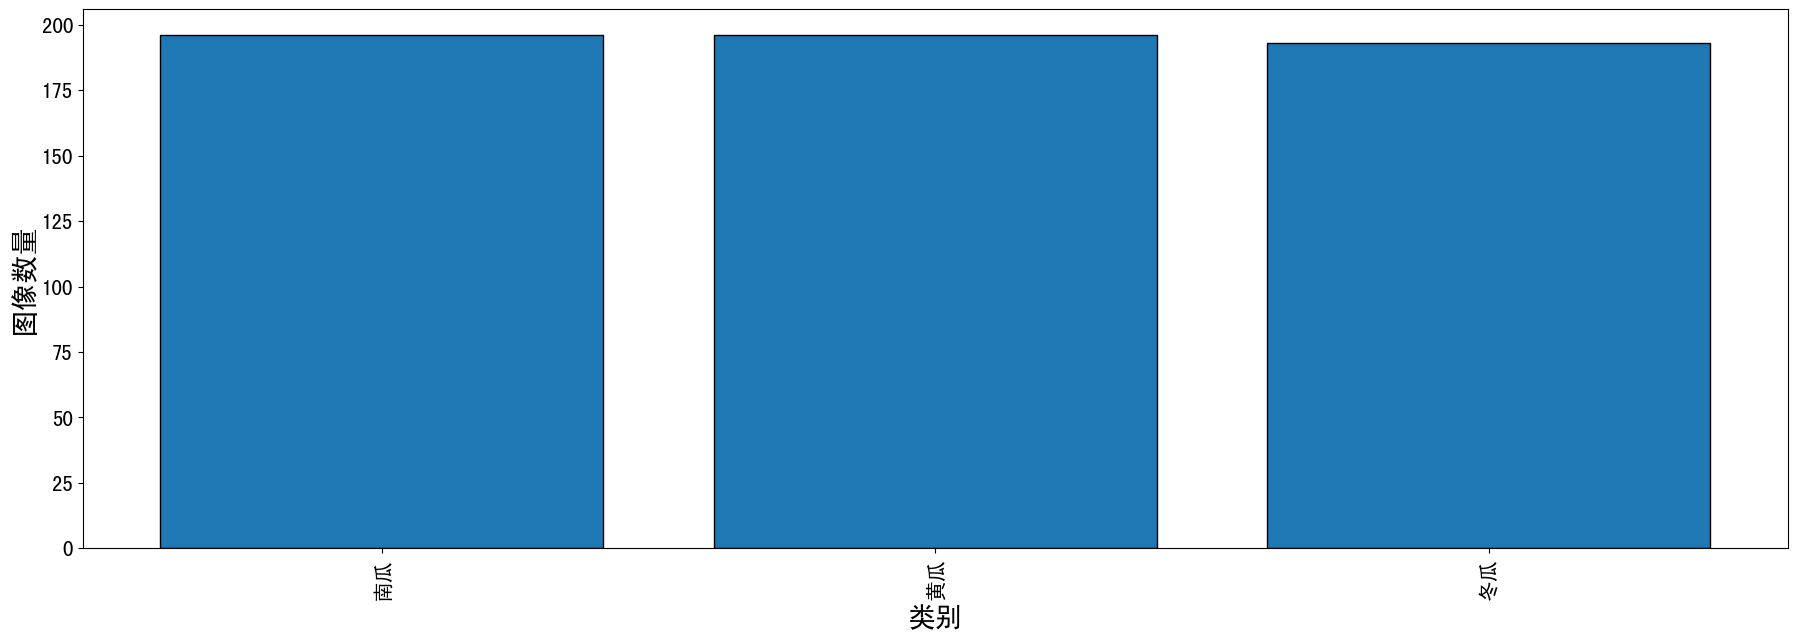

In [12]:
plt.figure(figsize=(22, 7))

x = df['class']
y = df[feature]

plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.xlabel('类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)

plt.savefig('reports/各类别图片数量.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 8. House Cleaning

In [16]:
!for i in `find . -iname '__MACOSX'`; do rm -rf $i;done
!for i in `find . -iname '.DS_Store'`; do rm -rf $i;done
!for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done